# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
x = [1,2,3,1]
y= [3,2,1,1]

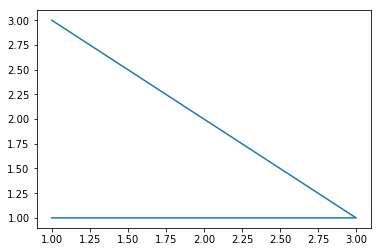

In [12]:
#doesn't pass
plt.plot(x,y)

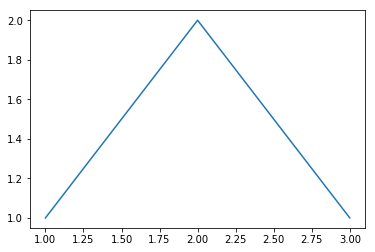

In [16]:
x = [1,2,3]
y= [1,2,1]
plt.plot(x,y)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because for every input we should have exactly one output that doesn't change. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

R2

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

R3 for domain
R3 for range

R4 for domain
R2 for range

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Sure! An example is 

\begin{align}
m(𝑥_1,𝑥_2)=(x_1+x_2, 2*x_1, 2*x_2)
\\
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

Let's start by passing in the unit vectors for p

\begin{align}
x_1 = \begin{bmatrix}1 \\ 0 \end{bmatrix}
\end{align}

\begin{align}
x_2 = \begin{bmatrix}0 \\ 1\end{bmatrix}
\end{align}

\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

Let's start by passing in the unit vectors for q

\begin{align}
x_1 = \begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}
\end{align}

\begin{align}
x_2 = \begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}
\end{align}

\begin{align}
x_3 = \begin{bmatrix}0 \\ 0\\ 1\end{bmatrix}
\end{align}

\begin{align}
T = \begin{bmatrix} 4 & 1 & 2\\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [64]:
t = np.array([[1,3],[-1,2]])

In [65]:
t

array([[ 1,  3],
       [-1,  2]])

In [54]:
v1 = np.array([13,3])

In [66]:
np.matmul(t,v1)

array([22, -7])

In [67]:
t2 = np.array([[4,1,2],[-1,2,3],[5,1,-2]])

In [70]:
v2 = np.array([1,1,1])

In [71]:
np.matmul(t2,v2)

array([7, 4, 4])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are a special form of vector that when given a specific transformation they are simply scaled and not knocked off the space they orignally spanned. Most vectors in a subspace would be shifted, flipped, turned around after the transformation but not eigenvectors. 

Eigenvalues are simply a scalar - determining how much to shrink/scale the eigenvector on it's span.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

It's computationally hard on your computer
Diminishing returns for adding new features

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times the amount of observations as features

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [72]:
import pandas as pd

In [93]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [94]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Split data in X,Y

In [95]:
x = df.loc[:,'sepal_length':'petal_width']

In [96]:
y = df['species']

## Center each column
subtract mean and divide by std

In [97]:
x.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [98]:
for col in x.columns:
    x[col] = (x[col] - x[col].mean()) /x[col].std()

In [105]:
z = x.copy()

## cov matrix


In [110]:
covariance_matrix = np.cov(z.T)

In [111]:
covariance_matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

## eigenvalues

In [113]:
e_vals, e_vect = np.linalg.eig(covariance_matrix)

In [114]:
e_vals

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [115]:
e_vect

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

## matrix transformation to project the datapoints onto our eigenvector subspaces

In [116]:
P = e_vect.T.dot(z.T)

In [117]:
P

array([[-2.25698063e+00, -2.07945912e+00, -2.36004408e+00,
        -2.29650366e+00, -2.38080159e+00, -2.06362348e+00,
        -2.43754534e+00, -2.22638327e+00, -2.33413810e+00,
        -2.18136797e+00, -2.15626287e+00, -2.31960686e+00,
        -2.21665672e+00, -2.63090249e+00, -2.18497165e+00,
        -2.24394778e+00, -2.19539570e+00, -2.18286636e+00,
        -1.88775015e+00, -2.33213620e+00, -1.90816387e+00,
        -2.19728429e+00, -2.76490710e+00, -1.81433338e+00,
        -2.22077769e+00, -1.95048969e+00, -2.04521166e+00,
        -2.16095426e+00, -2.13315968e+00, -2.26121491e+00,
        -2.13739396e+00, -1.82582143e+00, -2.59949432e+00,
        -2.42981077e+00, -2.18136797e+00, -2.20373717e+00,
        -2.03759040e+00, -2.18136797e+00, -2.42781878e+00,
        -2.16329995e+00, -2.27889274e+00, -1.86545777e+00,
        -2.54929405e+00, -1.95772074e+00, -2.12624970e+00,
        -2.06842817e+00, -2.37330742e+00, -2.39018435e+00,
        -2.21934620e+00, -2.19858869e+00,  1.10030752e+0

# Using Sklearn

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA(4)

In [121]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [122]:
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]

 Eigenvalues: 
 [2.91081808 0.92122093 0.14735328 0.02060771]

 Projected Data: 
 [[ 2.66923088e+00  5.18088722e+00 -2.50606121e+00  1.15201064e-01]
 [ 2.69643401e+00  4.64364530e+00 -2.48287429e+00  1.05532777e-01]
 [ 2.48116330e+00  4.75218345e+00 -2.30435358e+00  1.02643429e-01]
 [ 2.57151243e+00  4.62661492e+00 -2.22827673e+00  2.76660361e-01]
 [ 2.59065822e+00  5.23621104e+00 -2.40975624e+00  1.53814104e-01]
 [ 3.00809881e+00  5.68221692e+00 -2.45652515e+00  2.21893339e-01]
 [ 2.49094166e+00  4.90871397e+00 -2.10637596e+00  1.81430750e-01]
 [ 2.70145461e+00  5.05320922e+00 -2.44407359e+00  2.09102569e-01]
 [ 2.46158369e+00  4.36493047e+00 -2.14656917e+00  2.24117089e-01]
 [ 2.67166282e+00  4.73176885e+00 -2.50796192e+00  2.50416312e-01]
 [ 2.83139678e+00  5.479

In [125]:
df = pd.DataFrame(B)

In [131]:
df.plot(df[0],df[1],kind='scatter')

KeyError: "None of [Float64Index([2.6692308782935195,  2.696434011868957,  2.481163304164872,\n              2.5715124347750296,  2.590658224721359,  3.008098809946066,\n              2.4909416646093474,  2.701454608343912, 2.4615836931965207,\n               2.671662815909063,\n              ...\n               7.295978570323303,  7.053264786617746,  6.357753550341836,\n              7.4396953375237045,  7.357994092808545,  7.033251354627373,\n               6.613484943048689,  6.759093715581046,  6.782974379417496,\n              6.2744231328001545],\n             dtype='float64', length=150)] are in the [columns]"

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)